# Creating Labels

Import Resources

In [43]:
import uproot as up
import numpy as np 
import pypdt as pdt #this package contains particle id numbers if not installed, uncomment next 2 lines
import matplotlib.pyplot as plt
import time

#import sys
#!{sys.executable} -m pip install --user pypdt

In [44]:
#get data
file = up.open("skim_BsToJPsiPhi_2017_DCAP_10000.root")
print(file.keys())
data = file["PDtree"]
print(data.keys())

[b'PDtree;18', b'PDtree;17']
[b'runNumber', b'lumiSection', b'eventNumber', b'nMuons', b'muoPt', b'muoEta', b'muoPhi', b'muoE', b'muoTrk', b'muoCharge', b'muoType', b'nElectrons', b'nJets', b'jetPt', b'jetEta', b'jetPhi', b'jetE', b'jetCSV', b'jetTCHE', b'jetTrg', b'jetPF', b'jetNDau', b'jetNHF', b'jetNEF', b'jetCHF', b'jetCEF', b'jetNCH', b'nTags', b'tagJet', b'tagType', b'tagProb', b'nPF', b'pfcPt', b'pfcEta', b'pfcPhi', b'pfcE', b'pfcCharge', b'pfcJet', b'pfcTrk', b'nTracks', b'trkPt', b'trkEta', b'trkPhi', b'trkCharge', b'trkType', b'trkNext', b'trkPFC', b'trkJet', b'trkPVtx', b'trkQuality', b'trkHitPattern', b'trkLayPattern', b'trkNormChi2', b'trkPtError', b'trkDxy', b'trkDz', b'trkExy', b'trkEz', b'trkVtxPx', b'trkVtxPy', b'trkVtxPz', b'nPVTotal', b'nPVertices', b'pvtX', b'pvtY', b'pvtZ', b'pvtSxx', b'pvtSyy', b'pvtSzz', b'pvtSxy', b'pvtSxz', b'pvtSyz', b'pvtNTracks', b'pvtNormChi2', b'pvtBadQuality', b'nSVertices', b'svtX', b'svtY', b'svtZ', b'svtSxx', b'svtSyy', b'svtSzz', b'sv

### Gen Charged Particles

In [45]:
#Generated Particles
NGenP = data.arrays(["nGenP"])[b'nGenP']
GenId = data.arrays(["genId"])[b'genId']
GenStatus = data.arrays(["genStatus"])[b'genStatus'] #status in the simulation, what does that mean?
GenMother = data.arrays(["genMother"])[b'genMother'] #position  in this same block of the mother particle
GenPartner = data.arrays(["genPartner"])[b'genPartner']
GenPt = data.arrays(["genPt"])[b'genPt']
GenEta = data.arrays(["genEta"])[b'genEta']
GenPhi = data.arrays(["genPhi"])[b'genPhi']
GenE = data.arrays(["genE"])[b'genE']
GenCharge = data.arrays(["genCharge"])[b'genCharge']
GenMass = data.arrays(["genMass"])[b'genMass']
GenVx = data.arrays(["genVx"])[b'genVx'] #production point
GenVy = data.arrays(["genVy"])[b'genVy']
GenVz = data.arrays(["genVz"])[b'genVz']

In [46]:
def get_charge(N):
    if pdt.get(N) == None and pdt.get(-N) == None:
        print("what is this particle ", N)
        return False
    elif pdt.get(N) == None:
        return str(-pdt.get(-N).charge) + " particle: anti-" +pdt.get(-N).name #the opposite charge 
    return str(pdt.get(N).charge) + " particle: " +pdt.get(N).name

Ouick look on charged particles

In [68]:
index = GenCharge != 0
charged = np.concatenate((GenId[index]))
for i,e in enumerate(charged[:10]):
    print("No: ",i, " Lund code: ",e, "charge: ",get_charge(e))

No:  0  Lund code:  2212 charge:  1.0 particle: p+
No:  1  Lund code:  2212 charge:  1.0 particle: p+
No:  2  Lund code:  431 charge:  1.0 particle: D(s)+
No:  3  Lund code:  2212 charge:  1.0 particle: p+
No:  4  Lund code:  -4122 charge:  -1.0 particle: anti-Lambda(c)+
No:  5  Lund code:  2212 charge:  1.0 particle: p+
No:  6  Lund code:  2212 charge:  1.0 particle: p+
No:  7  Lund code:  2212 charge:  1.0 particle: p+
No:  8  Lund code:  -523 charge:  -1.0 particle: anti-B*+
No:  9  Lund code:  2212 charge:  1.0 particle: p+


In [69]:
index[0]

array([ True,  True, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False,  True,
       False, False,  True, False, False, False,  True, False,  True,
        True, False, False, False, False, False, False, False, False,
        True, False, False,  True,  True, False, False, False,  True,
       False, False, False,  True,  True,  True,  True,  True, False,
       False,  True,  True,  True,  True, False,  True, False,  True,
       False,  True, False, False, False, False,  True,  True, False,
        True,  True])

Filter out uncharged particles:

In [48]:
index = GenCharge != 0
print(sum(np.concatenate(index)), " charged generated particles out of ", len(GenId.content), " particles")

236552  charged generated particles out of  808189  particles


In [49]:
NGenP_c = index.sum() #number of charged particles in each event --> NUMPY ARRAY

In [50]:
GenId_c = GenId[index];       GenStatus_c = GenStatus[index];
GenMother_c = GenMother[index];                          GenPartner_c = GenPartner[index]; 
GenPt_c = GenPt[index];      GenEta_c  = GenEta[index];          GenPhi_c = GenPhi[index];
GenE_c = GenE[index];        GenCharge_c = GenCharge[index];   GenMass_c = GenMass[index];
GenVx_c = GenVx[index];      GenVy_c = GenVy[index];           GenVz_c = GenVz[index]; #--> JAGGED ARRAYS

Double check:

In [51]:
print(sum(GenId_c.counts == NGenP_c)) 

10000


### Tracks

In [52]:
Ntracks = data.arrays(["nTracks"])[b'nTracks']
TrkPt = data.arrays(["trkPt"])[b'trkPt']
TrkEta = data.arrays(["trkEta"])[b'trkEta']
TrkPhi = data.arrays(["trkPhi"])[b'trkPhi']
TrkCharge = data.arrays(["trkCharge"])[b'trkCharge']
TrkType = data.arrays(["trkType"])[b'trkType']
TrkNext = data.arrays(["trkNext"])[b'trkNext']
TrkPFC = data.arrays(["trkPFC"])[b'trkPFC']
TrkJet = data.arrays(["trkJet"])[b'trkJet']
TrkPVtx = data.arrays(["trkPVtx"])[b'trkPVtx']
TrkQuality = data.arrays(["trkQuality"])[b'trkQuality']
TrkHitPattern = data.arrays(["trkHitPattern"])[b'trkHitPattern']
TrkLayPattern = data.arrays(["trkLayPattern"])[b'trkLayPattern']
TrkNormChi2 = data.arrays(["trkNormChi2"])[b'trkNormChi2']
TrkPtError = data.arrays(["trkPtError"])[b'trkPtError']
TrkDxy = data.arrays(["trkDxy"])[b'trkDxy'] #impact parameter
TrkDz = data.arrays(["trkDz"])[b'trkDz']
TrkExy = data.arrays(["trkExy"])[b'trkExy']
TrkEz = data.arrays(["trkEz"])[b'trkEz']                              
TrkVtxPx = data.arrays(["trkVtxPx"])[b'trkVtxPx']
TrkVtxPy = data.arrays(["trkVtxPy"])[b'trkVtxPy']
TrkVtxPz = data.arrays(["trkVtxPz"])[b'trkVtxPz']               

In [53]:
print(sum((np.concatenate(TrkCharge) == 0)), "out of ", len(np.concatenate(TrkCharge)) ," tracks are neutral? --> Get rid of them")
index0 = TrkCharge != 0 #

21 out of  5291784  tracks are neutral? --> Get rid of them


Get only "tracker tracks":

In [54]:
#track type  
TrkType_dict =   { 1: "general",2: "packed", 4:"pflink",8:"rclink",16:"gplink",1024:"muInner"}
                  #this later part is not valid (for some reason !?)
                  #2048: "muStandalone",4096:"muGlobal",8192:"muBest",16384:"muPF",32768:"muReco"}

index = index0 == ((TrkType == 2) + (TrkType == 4) + (TrkType == 8) + (TrkType == 16) + (TrkType == 1024))
print(len(np.concatenate(index))-sum(np.concatenate(index)), "tracks filtered out")
#should be 92819   +   21

92840 tracks filtered out


In [55]:
Ntracks = TrkType.counts
print(Ntracks)
#print(sum(Ntracks == Ntracks2), "events have the same #tracks after the filter")

[602 433 419 ... 437 323 605]


In [56]:
TrkPt = TrkPt[index]; TrkEta = TrkEta[index]; TrkPhi = TrkPhi[index];
TrkCharge = TrkCharge[index] ; TrkType = TrkType[index]

### Association of Tracks and GenP's
Look on the first event

[-0.9779962  1.5496689  1.4167303  1.1625721 -1.647084   0.1474044
 -1.7574999  2.3864863]
[-1.4497036 -0.9433057 -0.7675041 -0.5422162 -1.3629353 -4.552915
 -1.5938219 -2.9382882]
first two particles:
what is this particle  6500.0
what is this particle  6500.0
None


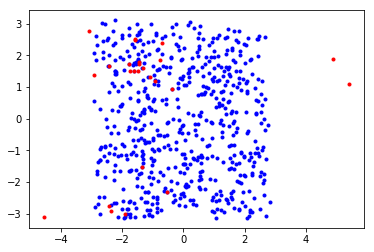

In [71]:
eventN = 0
plt.plot(TrkEta[eventN],TrkPhi[eventN],'.',c="b")
plt.plot(GenEta_c[eventN][2:],GenPhi_c[eventN][2:],'.',c = "r") #first two genparticles are too far
print(TrkEta[eventN][2:10])
print(GenEta_c[eventN][2:10])

print("first two particles:")
get_charge(GenE_c[eventN][0])
get_charge(GenE_c[eventN][1])
print(pdt.get(6500))
#plt.show()

In [58]:
stable_part_dict = {11: "e-",-11:"e+",13:"mu-",-13:"mu+", 211:"pi+", -211:"pi-",\
                    321:"K+",-321: "K-", 2212: "p+"}
stable_part_dict.keys()

dict_keys([11, -11, 13, -13, 211, -211, 321, -321, 2212])

In [59]:
pdt.get(321)

K+: ID=321, m=0.49 GeV, 3*q=3, width=5.3e-17 GeV, tau=1.2e+04 ps, ctau=3.7e+03 mm

Some conditions to be fulfilled:  <br>
1) distance $< 0.12$ <br>
2) $\frac{\lvert GenPt - TrkPt \rvert}{GenPt}  < 0.3$

In [76]:
#this to run only once

tic = time.time()
genp_trk_labels =  -GenId_c.ones_like()

#uncomment variables to store into and check
#close_trks_eta = -GenEta_c.ones_like()   
#close_trks_phi = -GenEta_c.ones_like()
#close_trks_pt = -GenEta_c.ones_like()
dist_gen_trk   = -GenEta_c.ones_like()

# i:eventN
def gen_trk_association(i): 
    dist = None
    #variables
    gen_etas = GenEta_c[i]
    trk_etas = TrkEta[i]
    gen_phis = GenPhi_c[i]
    trk_phis = TrkPhi[i]
    gen_pts = GenPt_c[i]
    trk_pts = TrkPt[i]
    
    gen_ids = GenId_c[i]
    #distance functions
    delta_eta_square = lambda eta1,eta2: (eta1-eta2)**2
    delta_phi_square = lambda phi1,phi2: (np.pi-np.abs(np.abs(phi1-phi2)-np.pi))**2
    #loop over gen particles
    for j,eta1 in enumerate(gen_etas):
        phi1 = gen_phis[j]
        pt1 = gen_pts[j]
        id1 = gen_ids[j]
        ###########################################
        #work only with long living particles:
        #if id1 not in stable_part_dict.keys():
        #    continue
    
        ###########################################
        #find the closest track to this gen particle
        distance_trk = (delta_eta_square(eta1,trk_etas) + delta_phi_square(phi1,trk_phis))**0.5
        dist = np.amin(distance_trk)
        index = np.argmin(distance_trk) #track index
        
        ###########################################
        #is this the closest gen particle to this track? If not, skip the next steps
        distance_gen = (delta_eta_square(gen_etas,trk_etas[index])+delta_phi_square(gen_phis,trk_phis[index]))**0.5
        dist_gen = np.amin(distance_gen)
        index_gen = np.argmin(distance_gen) #gen index != track index
        if j!= index_gen: 
            continue
            
        ##########################################
        if dist == None:    #sth wrong
            return False
        ##########################################
        #conditions
        if dist < 0.12 and np.abs(pt1-trk_pts[index])/pt1 < 0.3:
            #uncomment to store values
            #close_trks_eta[i][j]  = trk_etas[index];close_trks_phi[i][j] = trk_phis[index];
            dist_gen_trk[i][j] = dist 
            genp_trk_labels[i][j] = index
        '''
        dist_gen_trk[i][j] = dist 
        genp_trk_labels[i][j] = index
        '''
    return True

N = 10000 #up to event N
[gen_trk_association(i) for i in range(N)];

toc = time.time()
print(toc - tic)

14.029169797897339


In [73]:
sum(np.concatenate(genp_trk_labels) != -1)

121291

Elapsed time for 10k events:12  s

Visualize some events

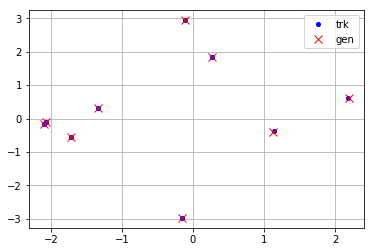

In [77]:
eventN = 60
index = (genp_trk_labels != -1)[eventN]
trk_index = genp_trk_labels[eventN][index]

plt.plot(TrkEta[eventN][trk_index],TrkPhi[eventN][trk_index],'.',c="b",label = "trk",markersize = 8) #trk
plt.plot(GenEta_c[eventN][index],GenPhi_c[eventN][index],'x',c="r", label = "gen",markersize = 8) #gen
plt.legend()
plt.grid()
#plt.xlim(-1,0);plt.ylim(2,3) #to zoom in

Labels have -1 for unassigned genp and track index if assigned.

In [63]:
print(sum(genp_trk_labels.content != -1), "genp particles labeled out of", len(genp_trk_labels.content),\
      "using closest gen particle") 

73023 genp particles labeled out of 236552 using closest gen particle
